In [1]:
import tarfile
from itertools import groupby
from zlib import decompress
import functools

import numpy as np
import zstandard

import seaborn as sns

In [3]:
from extractors import Extractor

In [4]:
raw_pre_path = "raw/imp-pre.tzst"
pre_path = "dataset"
extractor = Extractor(raw_pre_path, pre_path)

extractor.decompress_tzst()

KeyboardInterrupt: 

In [5]:
import polars as pl

In [6]:
metadata = pl.read_csv('raw/metadata.csv', try_parse_dates=True)
metadata

user,start_date,end_date,length_days,length_years,potential_samples,actual_samples,missing_samples_abs,missing_samples_pct,contract_start_date,contract_end_date,contracted_tariff,self_consumption_type,p1,p2,p3,p4,p5,p6,province,municipality,zip_code,cnae
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,i64,i64,i64,f64,date,date,str,str,f64,f64,f64,f64,f64,f64,str,str,i64,i64
"""00000c5a448d9faa097b761cc98036…",2022-05-30 01:00:00 UTC,2022-06-05 00:00:00 UTC,6.0,0.016427,144,144,0,0.0,2022-05-31,null,"""2.0TD""","""""",2.2,2.2,0.0,0.0,0.0,0.0,"""Gipuzkoa""",null,null,9329
"""0001b3b2f18c01c62ed9b2a87de7b4…",2017-05-31 01:00:00 UTC,2022-06-05 00:00:00 UTC,1831.0,5.013005,43944,43863,81,0.184326,2021-06-01,null,"""2.0TD""","""""",3.45,3.45,null,null,null,null,"""Bizkaia""",null,null,9820
"""0003de2700e20a1681d69fe287441d…",2017-05-31 01:00:00 UTC,2019-11-14 00:00:00 UTC,897.0,2.455852,21528,21476,52,0.241546,2019-09-02,2019-11-13,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20013,9820
"""0004150214d14a2b2e6f7075531e66…",2018-07-12 01:00:00 UTC,2022-06-05 00:00:00 UTC,1424.0,3.8987,34176,34169,7,0.020482,2021-06-01,null,"""2.0TD""","""""",9.2,9.2,null,null,null,null,"""Gipuzkoa""","""Irun""",20304,4759
"""000721f0fc6ccf02ae24b673939795…",2017-05-30 01:00:00 UTC,2022-06-04 00:00:00 UTC,1831.0,5.013005,43944,43815,129,0.293555,2021-06-01,null,"""2.0TD""","""""",4.4,4.4,null,null,null,null,"""Bizkaia""",null,null,9820
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ffeddf4919e748beb50af7c6b73def…",2018-10-02 01:00:00 UTC,2021-11-03 00:00:00 UTC,1128.0,3.088296,27072,27069,3,0.011082,2021-06-01,null,"""2.0TD""","""""",6.0,6.0,null,null,null,null,"""Soria""",null,null,9820
"""ffefb9e27715b1c3fa5007c457de55…",2021-07-06 01:00:00 UTC,2022-06-05 00:00:00 UTC,334.0,0.914442,8016,8014,2,0.02495,2021-07-07,null,"""2.0TD""","""""",3.45,3.45,0.0,0.0,0.0,0.0,"""Bizkaia""","""Bilbao""",48012,9820
"""fff0adcd6cdb7434496a5222f03337…",2017-08-17 01:00:00 UTC,2022-06-05 00:00:00 UTC,1753.0,4.799452,42072,41102,970,2.305571,2021-06-01,null,"""2.0TD""","""""",4.6,4.6,null,null,null,null,"""Bizkaia""",null,null,9820


In [26]:
metadata_pre_covid = metadata.filter([
    pl.col("start_date").is_between(pl.datetime(2000, 5, 31, time_zone="UTC"), pl.datetime(2020, 3, 1, time_zone="UTC"))
    ,pl.col("end_date").is_between(pl.datetime(2000, 5, 31, time_zone="UTC"), pl.datetime(2020, 3, 1, time_zone="UTC"))
])

metadata_pre_covid.head()

user,start_date,end_date,length_days,length_years,potential_samples,actual_samples,missing_samples_abs,missing_samples_pct,contract_start_date,contract_end_date,contracted_tariff,self_consumption_type,p1,p2,p3,p4,p5,p6,province,municipality,zip_code,cnae
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,i64,i64,i64,f64,date,date,str,str,f64,f64,f64,f64,f64,f64,str,str,i64,i64
"""0003de2700e20a1681d69fe287441d…",2017-05-31 01:00:00 UTC,2019-11-14 00:00:00 UTC,897.0,2.455852,21528,21476,52,0.241546,2019-09-02,2019-11-13,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20013,9820
"""002948d0317d4cb8582c2aeefdeab5…",2017-05-31 01:00:00 UTC,2018-04-17 00:00:00 UTC,321.0,0.87885,7704,7655,49,0.636033,2016-06-16,2018-04-16,"""2.1A""","""""",10.392,null,null,null,null,null,"""Araba/Alava""","""Vitoria-Gasteiz""",1013,9820
"""00452e5df1dccc6e84455aded6903e…",2019-07-05 01:00:00 UTC,2019-10-31 00:00:00 UTC,118.0,0.323066,2832,2831,1,0.035311,2019-07-06,2019-10-30,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20012,9820
"""009da9fed0568a951cc84f73a2daac…",2017-05-31 01:00:00 UTC,2020-01-11 00:00:00 UTC,955.0,2.614648,22920,22868,52,0.226876,2017-02-03,2020-01-10,"""2.0DHA""","""""",3.45,null,null,null,null,null,"""Navarra""",null,null,9820
"""012be362021dfaff2ae2ad9391657a…",2018-06-12 01:00:00 UTC,2019-08-03 00:00:00 UTC,417.0,1.141684,10008,10006,2,0.019984,2015-08-12,2019-08-02,"""2.0A""","""""",3.6,0.0,0.0,null,null,null,"""Araba/Alava""","""Vitoria-Gasteiz""",1001,9820


In [27]:
metadata_pre_covid['user'].unique()

user
str
"""149a07d34fb280f41876213ff0eb58…"
"""211789fecf3246fdf6f6ec1012788d…"
"""0d2858bddb029d5a519fd54ae49108…"
"""35f05a1680d442d95da7596ae29261…"
"""1a017a2587824749d4e890a61f8c86…"
…
"""e68f772ba30734a96f66e3c725a48a…"
"""f608eea11a67d0a832ddd879e27725…"
"""c754a6cef393f338621f1ddd5f7524…"


In [15]:
metadata_pre_covid['municipality'].value_counts()

municipality,count
str,u32
"""Lugo""",3
"""Getafe""",1
"""Guadalajara""",8
"""Coruna A""",1
"""Logrono""",1
…,…
"""Valencia""",1
"""Zaragoza""",1
"""Vitoria-Gasteiz""",75


In [16]:
metadata_pre_covid.filter(metadata_pre_covid['province'].is_not_null())

user,start_date,end_date,length_days,length_years,potential_samples,actual_samples,missing_samples_abs,missing_samples_pct,contract_start_date,contract_end_date,contracted_tariff,self_consumption_type,p1,p2,p3,p4,p5,p6,province,municipality,zip_code,cnae
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,i64,i64,i64,f64,date,date,str,str,f64,f64,f64,f64,f64,f64,str,str,i64,i64
"""0003de2700e20a1681d69fe287441d…",2017-05-31 01:00:00 UTC,2019-11-14 00:00:00 UTC,897.0,2.455852,21528,21476,52,0.241546,2019-09-02,2019-11-13,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20013,9820
"""002948d0317d4cb8582c2aeefdeab5…",2017-05-31 01:00:00 UTC,2018-04-17 00:00:00 UTC,321.0,0.87885,7704,7655,49,0.636033,2016-06-16,2018-04-16,"""2.1A""","""""",10.392,null,null,null,null,null,"""Araba/Alava""","""Vitoria-Gasteiz""",1013,9820
"""00452e5df1dccc6e84455aded6903e…",2019-07-05 01:00:00 UTC,2019-10-31 00:00:00 UTC,118.0,0.323066,2832,2831,1,0.035311,2019-07-06,2019-10-30,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20012,9820
"""009da9fed0568a951cc84f73a2daac…",2017-05-31 01:00:00 UTC,2020-01-11 00:00:00 UTC,955.0,2.614648,22920,22868,52,0.226876,2017-02-03,2020-01-10,"""2.0DHA""","""""",3.45,null,null,null,null,null,"""Navarra""",null,null,9820
"""012be362021dfaff2ae2ad9391657a…",2018-06-12 01:00:00 UTC,2019-08-03 00:00:00 UTC,417.0,1.141684,10008,10006,2,0.019984,2015-08-12,2019-08-02,"""2.0A""","""""",3.6,0.0,0.0,null,null,null,"""Araba/Alava""","""Vitoria-Gasteiz""",1001,9820
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ff1f8a74e8292b11c3100a587fbe65…",2018-01-09 01:00:00 UTC,2018-05-29 00:00:00 UTC,140.0,0.383299,3360,3359,1,0.029762,2017-03-21,2018-05-28,"""2.0A""","""""",1.15,null,null,null,null,null,"""Gipuzkoa""",null,null,9810
"""ff364d641e43f98beccda3da71c73c…",2018-01-18 01:00:00 UTC,2019-07-23 00:00:00 UTC,551.0,1.508556,13224,13221,3,0.022686,2017-11-17,2019-07-22,"""2.0DHA""","""""",3.45,null,null,null,null,null,"""Araba/Alava""",null,null,9820
"""ff7485847e9b69b2d74da193c0d6a4…",2017-05-31 01:00:00 UTC,2018-01-01 00:00:00 UTC,215.0,0.588638,5160,5112,48,0.930233,2017-06-01,2017-12-31,"""2.0DHA""","""""",0.345,null,null,null,null,null,"""Bizkaia""",null,null,8411


In [17]:
def getUniqueCount(df:pl.DataFrame, group_by:str):
    return df.group_by(group_by).len().sort('len', descending=True)

In [18]:
getUniqueCount(metadata_pre_covid, 'cnae')

cnae,len
i64,u32
9820,650
8411,36
9810,23
9821,18
5210,12
…,…
8122,1
5812,1
4399,1


# PLOTS

In [15]:
import seaborn as sns

In [14]:
df = pl.read_csv('dataset/goi4_pst/imp_csv/9d8f82f21c8e09dba6531395dac2bd59c2d11b612a23e27708764830bf966c9f.csv', try_parse_dates=True, schema_overrides={'kWh':pl.Float64})
df.head()

timestamp,kWh,imputed
datetime[μs],f64,i64
2021-05-31 00:00:00,0.0,0
2021-05-31 01:00:00,0.0,0
2021-05-31 02:00:00,0.0,0
2021-05-31 03:00:00,0.0,0
2021-05-31 04:00:00,0.0,0


In [15]:
def avg(df:pl.DataFrame, time_col = 'timestamp', value_col = 'kWh', period='1mo'):
    df_avg_m = df.group_by_dynamic(time_col, every=period, period=period, closed='left').agg(
        pl.col(value_col).mean()
    )
    return df_avg_m

def plot(df:pl.DataFrame, time_col='timestamp', value_col='kWh', color_col='profile_id'):
    sns.relplot(
        data=df, kind="line",
        hue=color_col,
        x=time_col, y=value_col)

def avg_plot(df:pl.DataFrame, time_col = 'timestamp', value_col = 'kWh', period='1mo',  color_col='profile_id',):
    df_avg_m = df.group_by_dynamic(time_col, every=period, period=period, closed='left').agg(
        pl.col(value_col).mean()
    )
    sns.relplot(
        data=df_avg_m, kind="line",
        hue=color_col,
        x=time_col, y=value_col)

    return df_avg_m

timestamp,kWh
datetime[μs],f64
2021-05-01 00:00:00,0.0
2021-06-01 00:00:00,0.0
2021-07-01 00:00:00,0.0
2021-08-01 00:00:00,0.0
2021-09-01 00:00:00,0.0892875
…,…
2022-02-01 00:00:00,0.16494
2022-03-01 00:00:00,0.176119
2022-04-01 00:00:00,0.145157


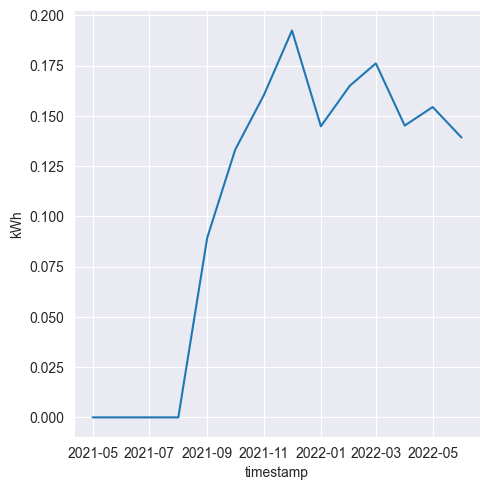

In [16]:
avg_plot(df, color_col=None)

# LIST OF HOUSEHOLD PROFILES

T - 97XX-98XX Activities of households

https://www.nature.com/articles/s41597-023-02846-0/tables/1

In [19]:
household_365_filter = (pl.col('cnae') > 9699) & (pl.col('cnae') < 9849) & (pl.col('length_years') >= 0.99)
# household_filter = (pl.col('cnae') > 9699) & (pl.col('cnae') < 9849)

metadata_pre_household_activities = metadata_pre_covid.filter(household_365_filter)
household_profiles = metadata_pre_household_activities['user'].unique().to_list()
len(household_profiles)

388

In [20]:
household_stats = metadata_pre_household_activities.describe()

In [21]:
min_days_household_stat = int(household_stats.filter(pl.col('statistic') == "min")['length_days'][0])
max_days_household_stat = int(household_stats.filter(pl.col('statistic') == "max")['length_days'][0])

In [22]:
range_min_max_household_stat = range(min_days_household_stat, max_days_household_stat)

pre_household_users_length_days_cum = [len(metadata_pre_household_activities.filter(pl.col('length_days') >= n_day)['user'].unique().to_list())  for n_day in range_min_max_household_stat]
pre_users_length_days_cum = [len(metadata_pre_covid.filter(pl.col('length_days') >= n_day)['user'].unique().to_list())  for n_day in range_min_max_household_stat]
users_length_days_cum = [len(metadata.filter(pl.col('length_days') >= n_day)['user'].unique().to_list())  for n_day in range_min_max_household_stat]


In [28]:
df_n_users = pl.DataFrame({
    "Min days present": range_min_max_household_stat,
    "# users (pre-COVID, household)": pre_household_users_length_days_cum,
    "# users (pre-COVID)": pre_users_length_days_cum,
    "# users (all)": users_length_days_cum,
})

In [29]:
df_n_users

Min days present,"# users (pre-COVID, household)",# users (pre-COVID),# users (all)
i64,i64,i64,i64
362,388,468,20487
363,386,466,20452
364,385,465,20442
365,385,464,20438
366,380,459,20420
…,…,…,…
1847,1,1,33
1848,1,1,32
1849,1,1,32


In [30]:
dfm = df_n_users.unpivot(index = df_n_users.columns[0], variable_name='cols', value_name='# users')
dfm

Min days present,cols,# users
i64,str,i64
362,"""# users (pre-COVID, household)""",388
363,"""# users (pre-COVID, household)""",386
364,"""# users (pre-COVID, household)""",385
365,"""# users (pre-COVID, household)""",385
366,"""# users (pre-COVID, household)""",380
…,…,…
1847,"""# users (all)""",33
1848,"""# users (all)""",32
1849,"""# users (all)""",32


Text(0.5, 1.0, 'Number of users available')

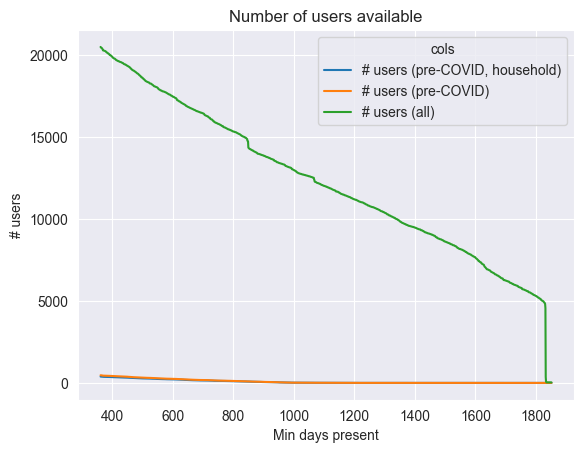

In [31]:
p = sns.lineplot(data = dfm,
             x = dfm.columns[0], y= dfm.columns[-1], hue='cols')
p.set_title("Number of users available")

# COMBINE

In [32]:
import glob

In [33]:
source_folder = 'dataset/goi4_pre/imp_csv'
csv_files = glob.glob(f"{source_folder}/*.csv")

In [34]:
df_household_activities = metadata_pre_household_activities.filter(household_365_filter)
household_profiles = df_household_activities['user'].unique().to_list()
len(household_profiles)

388

In [35]:
dataframes = pl.DataFrame()
for csv_file in csv_files:
    # print(f"processing {csv_file}")
    profile_id = csv_file.split('/')[-1].split('.')[0]
    if profile_id not in household_profiles:
        # print(f"skipping {csv_file}")
        continue

    df = pl.read_csv(csv_file, try_parse_dates=True, schema_overrides={'kWh':pl.Float64})
    # print(df.head())
    df = df.with_columns(pl.lit(profile_id).alias('profile_id'))
    if not dataframes.columns:
        dataframes = df.clone()
        continue
    dataframes.extend(df)

dataframes.head()

timestamp,kWh,imputed,profile_id
datetime[μs],f64,i64,str
2017-05-31 01:00:00,0.785,0,"""f4adb8579bde3666d0b784204add18…"
2017-05-31 02:00:00,1.138,0,"""f4adb8579bde3666d0b784204add18…"
2017-05-31 03:00:00,0.771,0,"""f4adb8579bde3666d0b784204add18…"
2017-05-31 04:00:00,0.981,0,"""f4adb8579bde3666d0b784204add18…"
2017-05-31 05:00:00,0.891,0,"""f4adb8579bde3666d0b784204add18…"


In [36]:
dataframes.write_csv("dataset/goi4_pre/household_activities_all.csv")

In [37]:
dataframes = pl.read_csv("dataset/goi4_pre/household_activities_all.csv")
dataframes.head()

timestamp,kWh,imputed,profile_id
str,f64,i64,str
"""2017-05-31T01:00:00.000000""",0.785,0,"""f4adb8579bde3666d0b784204add18…"
"""2017-05-31T02:00:00.000000""",1.138,0,"""f4adb8579bde3666d0b784204add18…"
"""2017-05-31T03:00:00.000000""",0.771,0,"""f4adb8579bde3666d0b784204add18…"
"""2017-05-31T04:00:00.000000""",0.981,0,"""f4adb8579bde3666d0b784204add18…"
"""2017-05-31T05:00:00.000000""",0.891,0,"""f4adb8579bde3666d0b784204add18…"


In [ ]:
df_avg = dataframes.group_by_dynamic('timestamp', group_by= 'profile_id', every='1mo', period='1mo', closed='right').agg(
        pl.col('kWh').mean()
    )
df_avg.head()

In [56]:
_df = dataframes.filter((pl.col('profile_id').str.starts_with('50')))
_df

timestamp,kWh,imputed,profile_id
datetime[μs],f64,i64,str
2021-05-31 00:00:00,0.344,0,"""50763044cb11d4c00dea544f8c418e…"
2021-05-31 01:00:00,0.11,0,"""50763044cb11d4c00dea544f8c418e…"
2021-05-31 02:00:00,0.106,0,"""50763044cb11d4c00dea544f8c418e…"
2021-05-31 03:00:00,0.082,0,"""50763044cb11d4c00dea544f8c418e…"
2021-05-31 04:00:00,0.133,0,"""50763044cb11d4c00dea544f8c418e…"
…,…,…,…
2022-06-04 20:00:00,0.044,0,"""50da64c7686a499cab8342c724e57b…"
2022-06-04 21:00:00,0.086,0,"""50da64c7686a499cab8342c724e57b…"
2022-06-04 22:00:00,0.075,0,"""50da64c7686a499cab8342c724e57b…"


In [39]:
sns.relplot(
    data=dataframes, kind="line",
    hue='profile_id', legend=False,
    x='timestamp', y='kWh',
    height=6, aspect=2,
    )


Error in callback <function flush_figures at 0x29bc12200> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
sns.relplot(
    data=dataframes, kind="line",
    legend=False,
    x='timestamp', y='kWh',
    height=6, aspect=2,
    )

In [40]:
metadata_pre_household_activities.head()

user,start_date,end_date,length_days,length_years,potential_samples,actual_samples,missing_samples_abs,missing_samples_pct,contract_start_date,contract_end_date,contracted_tariff,self_consumption_type,p1,p2,p3,p4,p5,p6,province,municipality,zip_code,cnae
str,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,i64,i64,i64,f64,date,date,str,str,f64,f64,f64,f64,f64,f64,str,str,i64,i64
"""0003de2700e20a1681d69fe287441d…",2017-05-31 01:00:00 UTC,2019-11-14 00:00:00 UTC,897.0,2.455852,21528,21476,52,0.241546,2019-09-02,2019-11-13,"""2.0A""","""""",4.6,null,null,null,null,null,"""Gipuzkoa""","""Donostia/San Sebastian""",20013,9820
"""009da9fed0568a951cc84f73a2daac…",2017-05-31 01:00:00 UTC,2020-01-11 00:00:00 UTC,955.0,2.614648,22920,22868,52,0.226876,2017-02-03,2020-01-10,"""2.0DHA""","""""",3.45,null,null,null,null,null,"""Navarra""",null,null,9820
"""012be362021dfaff2ae2ad9391657a…",2018-06-12 01:00:00 UTC,2019-08-03 00:00:00 UTC,417.0,1.141684,10008,10006,2,0.019984,2015-08-12,2019-08-02,"""2.0A""","""""",3.6,0.0,0.0,null,null,null,"""Araba/Alava""","""Vitoria-Gasteiz""",1001,9820
"""01e90c956801cbba4b611af5280f23…",2017-05-31 01:00:00 UTC,2019-03-13 00:00:00 UTC,651.0,1.782341,15624,15407,217,1.388889,2015-05-20,2019-03-12,"""2.0A""","""""",1.15,0.0,0.0,null,null,null,"""Bizkaia""","""Getxo""",48991,9820
"""02047fc3e7aca6c50150c59f0101fb…",2017-05-30 01:00:00 UTC,2019-01-29 00:00:00 UTC,609.0,1.667351,14616,14518,98,0.670498,2017-04-01,2019-01-28,"""2.0DHA""","""""",3.45,null,null,null,null,null,"""Bizkaia""","""Bilbao""",48004,9820


In [42]:
dataframes['profile_id'].unique()

profile_id
str
"""7a3cb3d6b46ebd71b5705c3b31da4a…"
"""62597a93ec72265745aa7d4bde5b0b…"
"""dcf8c6db9667168fe9e6c933af576e…"
"""ef5cc19524775c6b290cfd73c0b51d…"
"""0a630395bf858b28efd454cc6462ca…"
…
"""2058173c91235082f4f307ae2759ba…"
"""a525223b3dfe94f1d0a360ee2156d4…"
"""75ae69cb98e6d7533d62d5db5b464f…"


# COMBINE CSV USELESS

In [14]:
import glob
import pandas as pd

def combine_csv_files(source_folder, output_file):
    # Get a list of all .csv files in the source folder
    csv_files = glob.glob(f"{source_folder}/*.csv")

    # Create an empty list to store dataframes
    dataframes = []

    # Loop through each .csv file, read it, and append it to the list of dataframes
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        dataframes.append(df)

    # Concatenate all dataframes into one
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Save the combined dataframe to a new .csv file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined CSV saved to {output_file}")


In [15]:
combine_csv_files("dataset/goi4_pst/imp_csv", "output.csv")

Combined CSV saved to output


In [17]:
import csv

def combine_csv_files(source_folder, output_file):
    # Get a list of all .csv files in the source folder
    csv_files = glob.glob(f"{source_folder}/*.csv")

    # Open the output file in write mode
    with open(output_file, mode='w', newline='') as outfile:
        writer = csv.writer(outfile)

        # Variable to track if headers have been written
        headers_written = False

        # Loop through each .csv file
        for file_path in csv_files:

            # Open each CSV file in read mode
            with open(file_path, mode='r', newline='') as infile:
                reader = csv.reader(infile)

                # Write headers only once
                if not headers_written:
                    headers = next(reader)  # Read the header of the first file
                    writer.writerow(headers)  # Write the header to the output file
                    headers_written = True
                else:
                    next(reader)  # Skip the header of subsequent files

                # Write the data rows to the output file
                for row in reader:
                    writer.writerow(row)


combine_csv_files("dataset/goi4_pst/imp_csv", "output.csv")